In [39]:
import numpy as np
data = np.load("./data/gsn_img_uint8.npy")
mask = np.load("./data/gsn_msk_uint8.npy")
print(data.shape)
print(mask.shape)

(2000, 128, 128, 3)
(2000, 128, 128, 1)


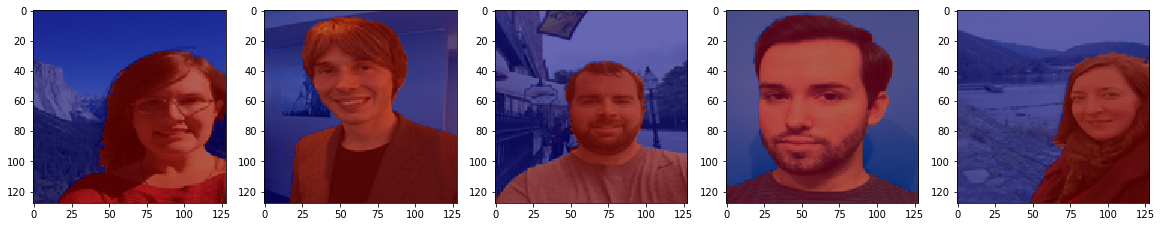

In [40]:
import matplotlib.pyplot as plt



# functions to show an image
def maskshow(mask):
    img = np.zeros((mask.shape[0], mask.shape[1], 3))
    img[:] = mask
    plt.imshow(img)
    plt.show()

def imshow(img):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(img,aspect='auto')
    plt.show()

# print(data[0].shape)
# for i in range(10):
#     maskshow(mask[i])
#     imshow(data[i])

def normalize(mask):
    return mask/255


def imshow_many(imgs):
    n = imgs.shape[0]
    if n < 20 :
        cols = 5
        rows = int((n+4)/5)
        fig = plt.figure(figsize=(cols * 4, rows * 4))
    else :
        cols = 10
        rows = int((n+9)/10)
        fig = plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(n):
        sub = fig.add_subplot(rows, cols, i + 1)
        if(imgs.shape[3] == 1) :
            imgs = imgs.reshape((imgs.shape[0], imgs.shape[1], imgs.shape[2]))
        sub.imshow(imgs[i], interpolation='nearest')

def imshow_masked(imgs, masks):
    n = imgs.shape[0]
    if n < 20 :
        cols = 5
        rows = int((n+4)/5)
        fig = plt.figure(figsize=(cols * 4, rows * 4))
    else :
        cols = 10
        rows = int((n+9)/10)
        fig = plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(n):
        sub = fig.add_subplot(rows, cols, i + 1)
        masks = masks.reshape((masks.shape[0], masks.shape[1], masks.shape[2]))
        sub.imshow(imgs[i], interpolation='nearest')
        sub.imshow(masks[i], interpolation='nearest', cmap='jet', alpha=0.6)


imshow_masked(data[0:5], mask[0:5])


In [43]:
import random

def randomDataAug(data, mask):
    def identity(data):
        return data

    def horizontalSymmetry(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numRows - i  - 1][j] = data[i][j]
        return newData

    def verticalSymmetry(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[i][numCols - j - 1] = data[i][j]
        return newData

    def diagonalSymmetry1(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numRows - i - 1][numCols - j - 1] = data[j][i]
        return newData

    def diagonalSymmetry2(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[i][j] = data[j][i]
        return newData

    def rotateRight(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[j][numRows - i - 1] = data[i][j]
        return newData

    def rotateLeft(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numCols - j - 1][i] = data[i][j]
        return newData

    def rotateTwice(data):
        newData = np.zeros_like(data)
        numRows = data.shape[0]
        numCols = data.shape[1]
        for i in range(numRows):
            for j in range(numCols):
                newData[numCols - j - 1][numRows - i - 1] = data[j][i]
        return newData

    dataAug = [identity, horizontalSymmetry, verticalSymmetry,
               diagonalSymmetry1, diagonalSymmetry2, rotateLeft,
               rotateRight, rotateTwice]

    f = dataAug[random.randrange(0, 7, 1)]
    return f(data), f(mask)

def randomDataAugForDataset(data, mask):
    assert(data.shape[0] == mask.shape[0])
    for i in range(data.shape[0]):
        data[i], mask[i] = randomDataAug(data[i], mask[i])
        if(i % 200 == 199):
            print(i)
    return data, mask

199
399
599
799
999
1199
1399
1599
1799
1999


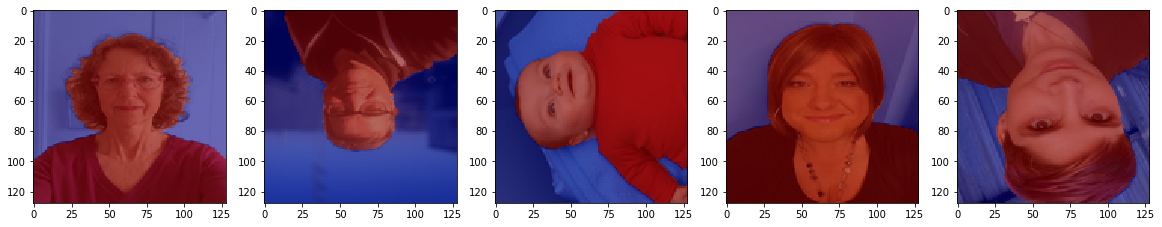

In [44]:
data, mask = randomDataAugForDataset(data, mask)
imshow_masked(data[1000:1005], mask[1000:1005])

# imshow(randomDataAug(data[0]))
# imshow(horizontalSymmetry(data[0]))
# imshow(verticalSymmetry(data[0]))
# imshow(diagonalSymmetry2(data[0]))
# imshow(diagonalSymmetry1(data[0]))
# imshow(rotateRight(data[0]))
# imshow(rotateLeft(data[0]))
# imshow(rotateTwice(data[0]))


def prepareAndRandDatasets():
    data = np.load("./data/gsn_img_uint8.npy")
    mask = np.load("./data/gsn_msk_uint8.npy")
    data, mask = randomDataAugForDataset(data, mask)
    return data, mask

def prepareTestDatasets():
    data = np.load("./data/test_gsn_image.npy")
    mask = np.load("./data/test_gsn_mask.npy")
    return data, mask
